In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os.path
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline

In [2]:
image_folder = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images'
images_name = ['thecolumn_2017-08-11_01_DJI_0121.JPG', 
               'thecolumn_2017-08-11_01_DJI_0053.JPG', 
               'thecolumn_2017-08-11_01_DJI_0054.JPG',
                'thecolumn_2017-08-11_01_DJI_0104.JPG',
              'thecolumn_2017-08-11_01_DJI_0191.JPG',
              'thecolumn_2017-08-11_01_DJI_0192.JPG']
#image_name = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0433.JPG'
images = []
for nm in images_name:
    print('reading file ' + os.path.join(image_folder, nm))
    images.append(mpimg.imread(os.path.join(image_folder, nm)))

reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0121.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0053.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0054.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0104.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0191.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/sowparnika_thecolumn_2017_08_11/Images/thecolumn_2017-08-11_01_DJI_0192.JPG


In [3]:
image_folder = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images'
images_name = ['DJI_0059.JPG', 
               'DJI_0060.JPG', 
               'DJI_0061.JPG',
               'DJI_0062.JPG',
               'DJI_0160.JPG', 
               'DJI_0161.JPG',
               'DJI_0162.JPG']
#image_name = '/media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0433.JPG'
images = []
for nm in images_name:
    print('reading file ' + os.path.join(image_folder, nm))
    images.append(mpimg.imread(os.path.join(image_folder, nm)))

reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0059.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0060.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0061.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0062.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0160.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0161.JPG
reading file /media/abhishek/6A140D7E140D4F0F/linux-data/test-datasets/2017_09_04/Images/DJI_0162.JPG


In [4]:
def plotImageLarge(img, cmap=None):
    fig, ax = plt.subplots(figsize=(21, 9))
    if cmap:
        ax.imshow(img, cmap=cmap)
    else:
        ax.imshow(img)    

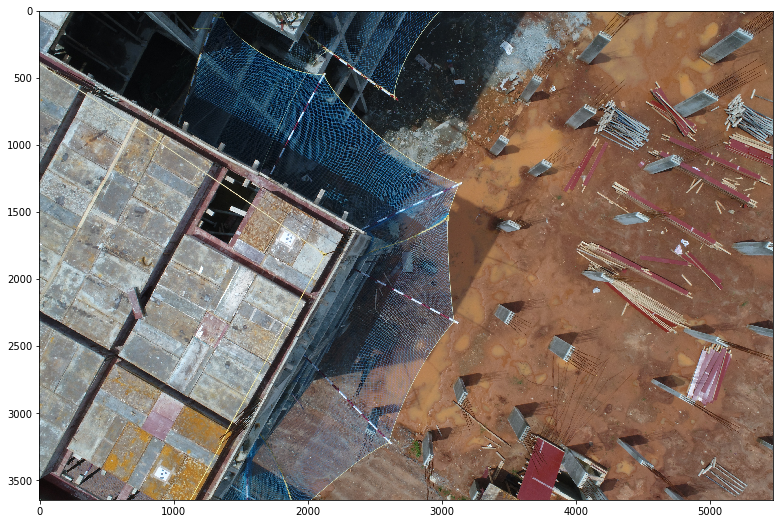

In [5]:
plotImageLarge(images[3])

In [76]:
# Setup SimpleBlobDetector parameters.
centerblob_params = cv2.SimpleBlobDetector_Params()

# Change thresholds
centerblob_params.minThreshold = 200
centerblob_params.maxThreshold = 255

# Filter by Area.
centerblob_params.filterByArea = True
centerblob_params.minArea = 80

# Filter by Circularity
centerblob_params.filterByCircularity = True
centerblob_params.minCircularity = 0.85

# Filter by Convexity
centerblob_params.filterByConvexity = True
centerblob_params.minConvexity = 0.87

# Filter by Inertia
centerblob_params.filterByInertia = True
centerblob_params.minInertiaRatio = 0.5

# Create a detector with the parameters
center_blob_detector = cv2.SimpleBlobDetector_create(centerblob_params)

# Setup SimpleBlobDetector parameters.
otherblobs_params = cv2.SimpleBlobDetector_Params()

# Change thresholds
otherblobs_params.minThreshold = 180
otherblobs_params.maxThreshold = 255

# Filter by Area.
otherblobs_params.filterByArea = True
otherblobs_params.minArea = 80

# Filter by Circularity
otherblobs_params.filterByCircularity = True
otherblobs_params.minCircularity = 0.1

# Filter by Convexity
otherblobs_params.filterByConvexity = True
otherblobs_params.minConvexity = 0.3

# Filter by Inertia
otherblobs_params.filterByInertia = False
otherblobs_params.minInertiaRatio = 0.01

# Create a detector with the parameters
otherblobs_detector = cv2.SimpleBlobDetector_create(otherblobs_params)

def circle_based_marker_detector(input_image, output_image_name):
    # Detect blobs.
    keypoints = center_blob_detector.detect(input_image)
    shifted_keypoints = []
#     for kp in keypoints:
#         print(kp.pt, kp.angle, kp.size)

    crops = []
    if len(keypoints) > 0:
        # Draw detected blobs as red circles.
        # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
        # the size of the circle corresponds to the size of blob

        im_with_keypoints = cv2.drawKeypoints(input_image, keypoints, np.array([]), (0, 255, 0),
                                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        for kp in keypoints:
            imsize = im_with_keypoints.shape
            center = (round(kp.pt[0]), round(kp.pt[1]))
            stretch = round(kp.size * 4)
            w = center[0]-stretch
            n = center[1]-stretch
            if center[0]-stretch < 0:
                w = 0
            if center[1]-stretch < 0:
                n = 0
            e = center[0]+stretch
            s = center[1]+stretch
            if center[0]+stretch < 0:
                e = 0
            if center[1]+stretch < 0:
                s = 0
            nw = (w, n)
            se = (e, s)
            cv2.circle(im_with_keypoints, center, 100, (255, 0, 0), 5)
            cv2.circle(im_with_keypoints, center, 2, (255, 255, 0), 1)
            cv2.rectangle(im_with_keypoints, nw, se, (0, 0, 255), 5)
            print(nw, se)
            crop = input_image[nw[1]:se[1], nw[0]:se[0]]
            crops.append(crop)
            skp = center_blob_detector.detect(crop)
            for sk in skp:
                print(sk.pt, sk.size)
                shifted_keypoints.append(sk)
#             plt.imshow(crop)
#             plt.show()

        # Show blobs
#         plotImageLarge(im_with_keypoints)
#         plt.show()
        #cv2.imwrite('detected_marker.png', im_with_keypoints)
        cv2.imwrite(output_image_name + '.png', im_with_keypoints)
    return shifted_keypoints, crops


def otherblobs_marker_detector(input_image, output_image_name):
    # Detect blobs.
    keypoints = otherblobs_detector.detect(input_image)

#     for kp in keypoints:
#         print(kp.pt, kp.angle, kp.size)

    if len(keypoints) > 0:
        # Draw detected blobs as red circles.
        # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
        # the size of the circle corresponds to the size of blob

        im_with_keypoints = cv2.drawKeypoints(input_image, keypoints, np.array([]), (0, 255, 0),
                                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        for kp in keypoints:
            imsize = im_with_keypoints.shape
            center = (round(kp.pt[0]), round(kp.pt[1]))
#             cv2.circle(im_with_keypoints, center, 100, (255, 255, 0), 5)
            cv2.circle(im_with_keypoints, center, 2, (255, 0, 0), 1)

        # Show blobs
#         plotImageLarge(im_with_keypoints)
        plt.imshow(im_with_keypoints)
        plt.show()
        #cv2.imwrite('detected_marker.png', im_with_keypoints)
        cv2.imwrite(output_image_name + '.png', im_with_keypoints)
    return keypoints

In [77]:
def orb_marker_detector(input_image, output_image_name):
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    gray_image_blur = cv2.medianBlur(gray_image,5)
    ret,th_image = cv2.threshold(gray_image_blur,200,255,cv2.THRESH_BINARY)

    # Initiate detector
    detector = cv2.AKAZE_create()

    # find the keypoints and descriptors with SIFT
    keypoints, descriptors = detector.detectAndCompute(th_image,None)

#     for kp in keypoints:
#         print(kp.pt, kp.angle, kp.size)

    if len(keypoints) > 0:
        # Draw detected blobs as red circles.
        # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
        # the size of the circle corresponds to the size of blob

        im_with_keypoints = cv2.drawKeypoints(input_image, keypoints, np.array([]), (0, 255, 0),
                                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#         for kp in keypoints:
#             imsize = im_with_keypoints.shape
#             center = (round(kp.pt[0]), round(kp.pt[1]))
# #             cv2.circle(im_with_keypoints, center, 100, (255, 255, 0), 5)
#             cv2.circle(im_with_keypoints, center, 2, (255, 0, 0), 1)

        # Show blobs
        plt.imshow(im_with_keypoints)
        plt.show()
        #cv2.imwrite('detected_marker.png', im_with_keypoints)
        cv2.imwrite(output_image_name + '.png', im_with_keypoints)
    return keypoints, descriptors

(2477, 348) (2643, 514)
(82.82256317138672, 83.42999267578125) 20.72881507873535


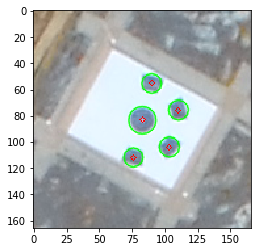

(1362, 2517) (1520, 2675)
(79.31533813476562, 78.95111083984375) 19.664608001708984
(2274, 790) (2436, 952)
(80.94975280761719, 81.13790893554688) 20.320083618164062


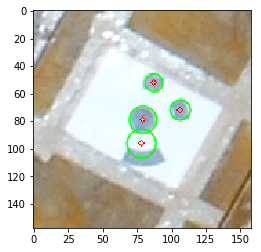

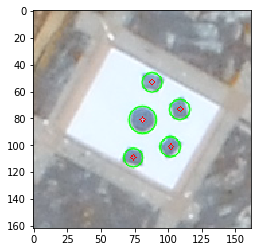

(1099, 2938) (1255, 3094)
(78.14192962646484, 78.31791687011719) 19.423229217529297
(2014, 1195) (2180, 1361)
(83.32403564453125, 83.04814147949219) 20.62627601623535


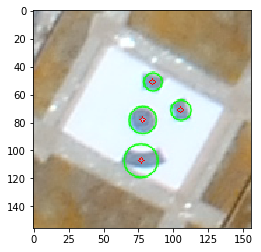

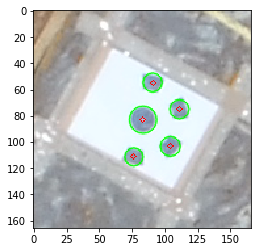

(838, 3374) (998, 3534)
(80.0850601196289, 79.70037078857422) 20.119688034057617
(1768, 1620) (1934, 1786)
(83.49797058105469, 82.70877075195312) 20.77469253540039


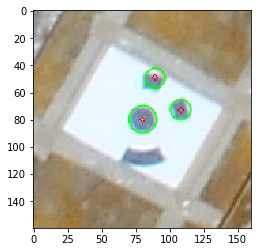

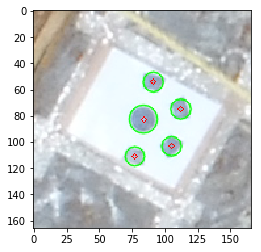

(2330, 487) (2510, 667)
(89.99807739257812, 89.50443267822266) 22.6217041015625
(2391, 1632) (2553, 1794)
(81.23524475097656, 80.70818328857422) 20.28237533569336


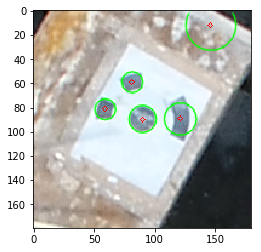

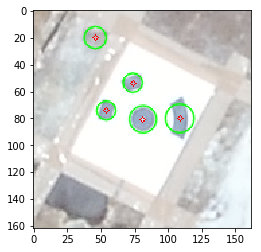

(2173, 804) (2357, 988)
(92.4099349975586, 91.92034149169922) 22.923660278320312


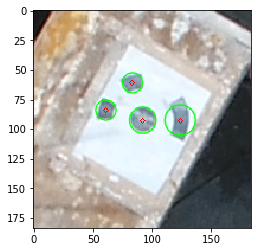

(2012, 1124) (2192, 1304)
(89.71658325195312, 90.0109634399414) 22.543628692626953
(1985, 2440) (2145, 2600)
(80.25917053222656, 79.77632141113281) 20.08502769470215


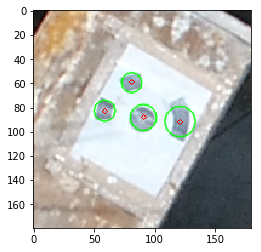

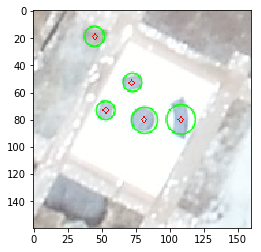

In [78]:
centerkp = []
kplist = []
for i in range(len(images)):
    markerkp, crops = circle_based_marker_detector(images[i], 'detected_marker1')
    centerkp.append(markerkp)
    kps = {}
    for j in range(len(crops)):
        kps[j] = otherblobs_marker_detector(crops[j], 'crops-marker')
    kplist.append(kps)
#         kp, desc = orb_marker_detector(crops[i], 'crops-marker')
#         kplist.append((crops[i], kp, desc))

In [112]:
for i in range(len(centerkp)):
    for j in range(len(centerkp[i])):
        blob_config = {}
        center = centerkp[i][j]
        blob_config['center'] = [round(center.size)]
        blob_config['outers'] = []
        blob_config['rejects'] = []
        print('image ' + str(i) + ' marker ' + str(j) + ', center is at ', 
              center.pt, ' size is ', round(center.size))
        outer_blob_dist_range = [round(1.3 * center.size), round(1.7 * center.size)]
#         print (outer_blob_dist_range)
        for kp in kplist[i][j]:
            dist = cv2.norm(center.pt, kp.pt)
            slope = (center.pt[1] - kp.pt[1])/(center.pt[0] - kp.pt[0])
#             print('slope is ', round(slope))
#             print('other blob -> center is at ', kp.pt, ' size is ', round(kp.size)
#                  , ' dist from center is ', round(dist))
#             if round(kp.pt[0]) == round(center.pt[0]) and round(kp.pt[1]) == round(center.pt[1]):
            if round(dist) <= 2:
#                 print('... this is the CENTER blob')
                pass
            elif round(dist) >= outer_blob_dist_range[0] and round(dist) <= outer_blob_dist_range[1]:
#                 print('... this is a GOOD OUTER blob')
                blob_config['outers'].append((round(dist), round(slope)))
            else:
#                 print('... this outer blob will be REJECTED')
                blob_config['rejects'].append((round(dist)))
        print(blob_config)
            


image 0 marker 0, center is at  (82.82256317138672, 83.42999267578125)  size is  21
{'rejects': [], 'center': [21], 'outers': [(29, -4), (29, 1), (29, 0), (29, -4)]}
image 1 marker 0, center is at  (79.31533813476562, 78.95111083984375)  size is  20
{'rejects': [17], 'center': [20], 'outers': [(28, 0), (28, -3)]}
image 1 marker 1, center is at  (80.94975280761719, 81.13790893554688)  size is  20
{'rejects': [], 'center': [20], 'outers': [(29, -4), (29, 1), (29, 0), (29, -4)]}
image 2 marker 0, center is at  (78.14192962646484, 78.31791687011719)  size is  19
{'rejects': [], 'center': [19], 'outers': [(29, -21), (28, 0), (28, -4)]}
image 2 marker 1, center is at  (83.32403564453125, 83.04814147949219)  size is  21
{'rejects': [], 'center': [21], 'outers': [(29, -4), (29, 1), (29, 0), (29, -4)]}
image 3 marker 0, center is at  (80.0850601196289, 79.70037078857422)  size is  20
{'rejects': [], 'center': [20], 'outers': [(29, 0), (32, -3)]}
image 3 marker 1, center is at  (83.4979705810546

In [25]:
def compareMatchImages(kplist, a, b):
    cv2.ocl.setUseOpenCL(False)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    FLANN_INDEX_LSH = 6

    # index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    index_params= dict(algorithm = FLANN_INDEX_LSH,
                       table_number = 6, # 12
                       key_size = 12,     # 20
                       multi_probe_level = 1) #2

    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(kplist[a][2],kplist[b][2],k=3)
    # print(matches)
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    # ratio test as per Lowe's paper
    print (n)
    for i,m in enumerate(matches):
        if len(m) > 1:
            print(m[0].distance)
            if m[0].distance < 0.1*m[1].distance:
                matchesMask[i]=[1,0]
    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       matchesMask = matchesMask,
                       flags = 0)
    img3 = cv2.drawMatchesKnn(kplist[a][0],kplist[a][1],kplist[b][0],kplist[b][1],matches,None,**draw_params)
    #plt.imshow(img3,),plt.show()
    plotImageLarge(img3)

<DMatch 0x7f630f7909f0>
86.0
53.0
80.0
89.0
72.0
99.0
78.0
109.0
101.0
94.0
84.0
104.0
112.0
76.0
79.0
46.0
76.0
75.0
70.0
50.0
77.0
124.0
83.0
35.0
75.0
89.0
20.0
17.0
27.0
46.0
72.0
32.0
52.0
128.0
98.0
61.0
58.0
98.0
121.0
86.0
77.0
73.0
73.0
79.0
71.0
107.0
62.0
88.0
96.0
46.0
144.0
88.0
18.0
151.0
31.0
61.0
21.0
56.0
48.0
96.0
56.0
104.0
112.0
152.0
137.0
36.0
100.0
44.0


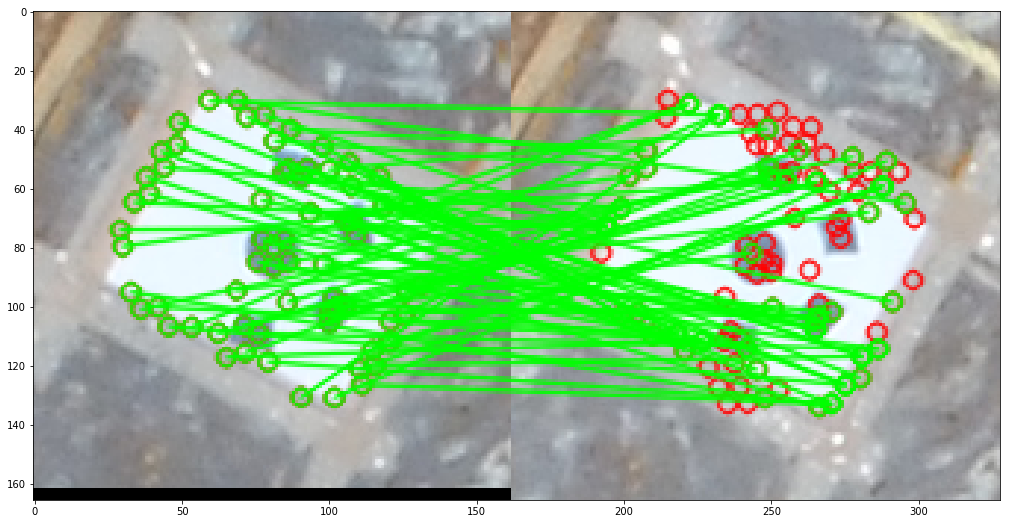

In [28]:
compareMatchImages(kplist, 2, 4)